# Default of Credit Card Clients

Описание данных:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Данные о людях (пояснительные переменные):
* `ID` - номер записи.
* `LIMIT_BAL` - количество средств, выданных человеку в кредит (тайваньских долларов). Индивидуальный кредит + дополнительные, семейные кредиты.
* `SEX` - пол (1 = мужчина; 2 = женщина).
* `EDUCATION` - (1 = закончил среднюю школу; 2 = университет; 3 = старшую школу; 4 = другое).
* `MARRIAGE` - семейное положение (1 = женат/замужем; 2 = не женат/не замужем; 3 = другое).
* `AGE` - возраст (лет).
* `PAY_0`, `PAY_2`, `PAY_3`, `PAY_4`, `PAY_5`, `PAY6` - история статуса погашения. `PAY_0` - статус погашения в сентябре 2005; `PAY_2` - в августе; ... ; `PAY_6` - в апреле. Статус: -1 = полностью погашено; 1 = погашено с задержкой в 1 месяц; 2 = с задержкой в 2 месяца; ... ; 8 = с задержкой в 8 месяцев; 9 = с задержкой в 9 месяцев или более.
* `BILL_AMT1`, `BILL_AMT2`, `BILL_AMT3`, `BILL_AMT4`, `BILL_AMT5`, `BILL_AMT6` - выписанный счет (тайваньских долларов). `BILL_AMT1` - за сентябрь 2005; ... ; `BILL_AMT6` - за апрель.
* `PAY_AMT1`, `PAY_AMT2`, `PAY_AMT3`, `PAY_AMT4`, `PAY_AMT5`, `PAY_AMT6` - количество внесенных средств (тайваньских долларов). `PAY_AMT1` - в сентябре 2005; ... ; `PAY_AMT6` - в апреле.

Переменная ответа (объект изучения):
* `default payment next month` - невыполнение договора займа (1 = дефолт, договор не выполнен; 0 = договор выполнен).

---

Как я понял эти данные:

* `BILL_AMTX` - пришла квитанция на оплату на следующий месяц. `BILL_AMT6` - на май (но пришла в конце апреля), ... , `BILL_AMT2` - на сентябрь, `BILL_AMT1` - на октябрь.
* `PAY_AMTX` - сколько человек заплатил в текущем месяце. `PAY_AMT6` - в апреле, `PAY_AMT5` - в мае, ... , `PAY_AMT1` - в сентябре.
* `PAY_X` - **_возможно_** число, показывающее покрыта ли квитанция на следующий месяц оплатой в следующем месяце. Или что-то наподобие. Эти колонки содержат значения, описания которых не были предоставлены.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [81]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
data = pd.read_excel(url, header=1)
data.shape

(30000, 25)

# Сокращение данных

Исходное количество строк 30000!

Удаляем некорректные данные:

В столбцах `PAY_0`, `PAY_2`, ... , `PAY_6` должны быть только значения -1, 1, 2, ... , 9.

В столбце `EDUCATION` должны быть только значения 1, 2, 3, 4.

В столбце `MARRIAGE` должны быть только значения 1, 2, 3.

In [82]:
statuses = [-1, 1, 2, 3, 4, 5, 6, 7, 8, 9]
data = data[data["PAY_0"].isin(statuses) & \
            data["PAY_2"].isin(statuses) & \
            data["PAY_3"].isin(statuses) & \
            data["PAY_4"].isin(statuses) & \
            data["PAY_5"].isin(statuses) & \
            data["PAY_6"].isin(statuses) & \
            data["EDUCATION"].isin([1, 2, 3, 4]) & \
            data["MARRIAGE"].isin([1, 2, 3])]
data.shape

(4030, 25)

Теперь осталось намного меньше строк.

In [84]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [85]:
# Сразу же уберем колонку ID
data = data.drop("ID", axis=1)
# Создадим уменьшенную копию таблицы, чтобы можно было что-то разглядеть на графиках
trimmed_data = data.drop(["SEX", "EDUCATION", "MARRIAGE", "AGE"], axis=1)

In [86]:
data.columns = [u'credit', u'sex', u'education', u'marriage', u'age',
                u'status09', u'status08', u'status07', u'status06', u'status05', u'status04',
                u'bill09', u'bill08', u'bill07', u'bill06', u'bill05', u'bill04',
                u'pay09', u'pay08', u'pay07', u'pay06', u'pay05', u'pay04',
                u'default']
trimmed_data.columns = [u'credit',
                        u'status09', u'status08', u'status07', u'status06', u'status05', u'status04',
                        u'bill09', u'bill08', u'bill07', u'bill06', u'bill05', u'bill04',
                        u'pay09', u'pay08', u'pay07', u'pay06', u'pay05', u'pay04',
                        u'default']
trimmed_data

,credit,status09,status08,status07,status06,status05,status04,bill09,bill08,bill07,bill06,bill05,bill04,pay09,pay08,pay07,pay06,pay05,pay04,default
11,260000,-1,-1,-1,-1,-1,2,12261,21670,9966,8517,22287,13668,21818,9966,8583,22301,0,3640,0
21,120000,-1,-1,-1,-1,-1,-1,316,316,316,0,632,316,316,316,0,632,316,0,1
28,50000,-1,-1,-1,-1,-1,-1,650,3415,3416,2040,30430,257,3415,3421,2044,30430,257,0,0
30,230000,-1,-1,-1,-1,-1,-1,16646,17265,13266,15339,14307,36923,17270,13281,15339,14307,37292,0,0
48,380000,-1,-1,-1,-1,-1,-1,22401,21540,15134,32018,11849,11873,21540,15138,24677,11851,11875,8251,0
58,200000,-1,3,2,2,2,2,1587,1098,782,1166,700,1414,0,0,700,0,1200,0,0
62,50000,2,2,2,2,2,2,24987,24300,26591,25865,27667,28264,0,2700,0,2225,1200,0,1
67,210000,2,-1,-1,-1,-1,-1,300,300,1159,2280,300,4250,300,1159,2280,300,4250,909,0
70,80000,-1,-1,-1,-1,-1,-1,780,0,390,390,390,390,0,390,390,390,390,390,0
71,320000,2,2,2,2,2,2,58267,59246,60184,58622,62307,63526,2500,2500,0,4800,2400,1600,1


 Подробное описание вверху.

 * `credit` – кредит.
 * `sex` - пол.
 * `education` - образование.
 * `marriage` - семейное положение.
 * `age` - возраст
 * `statusXX` - статус выплаты за XX месяц.
 * `billXX` - счет (квитанция) за XX месяц.
 * `payXX` - выплата за XX месяц.
 * `default` - не справился ли человек с кредитом.

In [87]:
trimmed_data.describe()

,credit,status09,status08,status07,status06,status05,status04,bill09,bill08,bill07,bill06,bill05,bill04,pay09,pay08,pay07,pay06,pay05,pay04,default
count,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000
mean,171657.568238,0.183871,0.289578,0.322581,0.287593,0.246154,0.252605,22090.757320,22256.289826,22321.209677,22618.342680,22590.346402,22701.868983,4654.058065,4609.700000,4719.065757,4547.375186,4605.919851,4590.067990,0.356328
std,125943.771452,1.575340,1.681448,1.738462,1.802048,1.780999,1.747022,44288.455981,44328.658159,44478.705160,44947.085387,44523.318928,45530.500711,10882.895838,11979.728987,13410.749346,11093.974616,13538.101017,14952.875407,0.478973
min,10000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4316.000000,-24704.000000,-61506.000000,-3903.000000,-3876.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,931.000000,856.000000,836.000000,832.250000,846.000000,780.000000,316.000000,316.000000,316.000000,330.500000,98.000000,0.000000,0.000000
50%,150000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4405.000000,4414.000000,4238.500000,4180.000000,4087.000000,4162.000000,1600.000000,1595.000000,1443.000000,1443.500000,1228.000000,1048.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,22234.000000,22758.750000,23026.250000,22900.500000,23345.500000,23999.250000,4411.750000,4395.250000,4200.000000,4100.000000,4000.000000,3710.000000,1.000000
max,740000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,581775.000000,572677.000000,471175.000000,486776.000000,503914.000000,527711.000000,187206.000000,302961.000000,417588.000000,193712.000000,303512.000000,345293.000000,1.000000


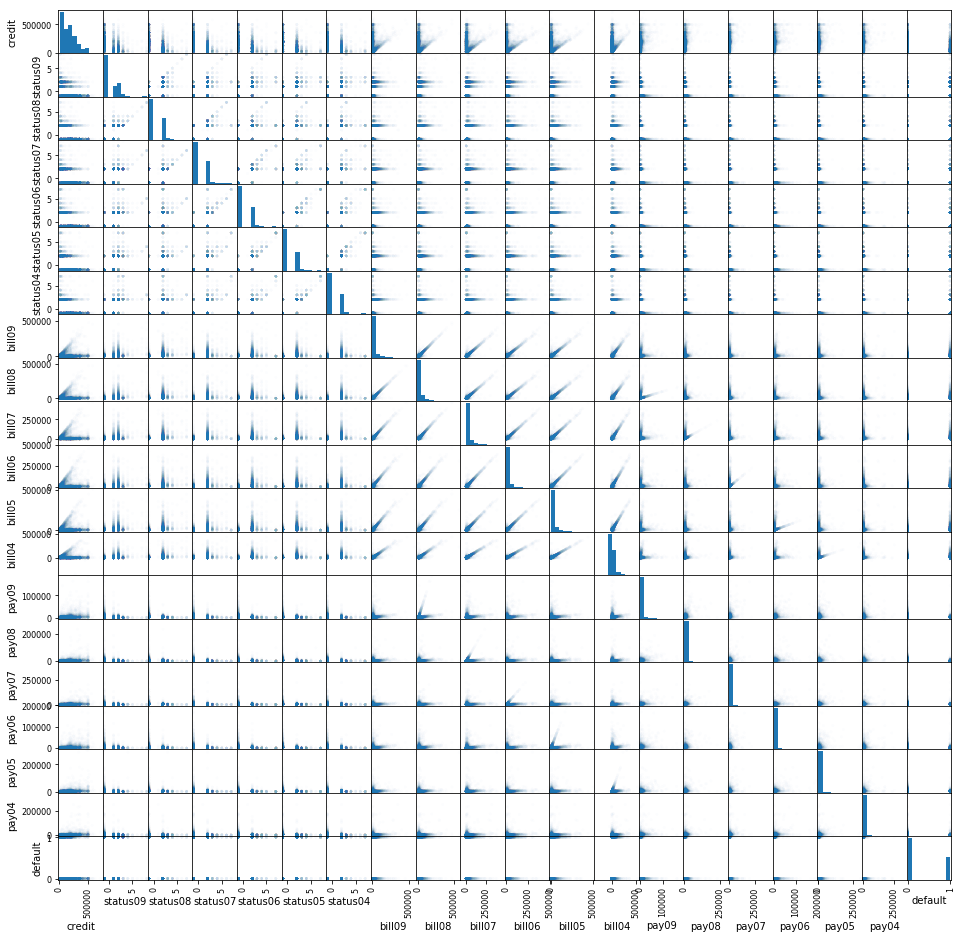

In [51]:
from pandas.plotting import scatter_matrix
scatter_matrix(trimmed_data, alpha = .01, figsize = (16, 16))
pass

# Задача

Необходимо проанализировать, как человек справлялся с оплатой поступающих ему квитанций и определить, сможет ли он оплатить следующий месяц.

# Готовим данные

In [88]:
# Категоричные колонки
categorial = [u'sex', u'education', u'marriage',
              u'status09', u'status08', u'status07', u'status06', u'status05', u'status04',
              u'default']
# Все остальные - численные
numerical = [col for col in data.columns if col not in categorial]
print(categorial)
print(numerical)

['sex', 'education', 'marriage', 'status09', 'status08', 'status07', 'status06', 'status05', 'status04', 'default']
['credit', 'age', 'bill09', 'bill08', 'bill07', 'bill06', 'bill05', 'bill04', 'pay09', 'pay08', 'pay07', 'pay06', 'pay05', 'pay04']


# Обрабатываем пропущенные значения

Выше уже были убраны строки с неопознанными данными в колонках `PAY_0`, ... , `PAY_6`. Поскольку в этих колонках данные должны описывать строгое состояние, то заменить неимеющие смысла значения медианным или самым популярным было бы неправильно.

# Векторизация

Сначала выделим бинарные и небинарные категориальные столбцы.

In [89]:
binary_columns    = [col for col in categorial if len(data[col].unique()) == 2]
nonbinary_columns = [col for col in categorial if col not in binary_columns]
print(binary_columns)
print(nonbinary_columns)

['sex', 'default']
['education', 'marriage', 'status09', 'status08', 'status07', 'status06', 'status05', 'status04']


Поскольку данные уже представлены в числовом абстрактом виде, то метод `get_dummies` никакого результата не даст.

In [122]:
# data_nonbinary = pd.get_dummies(data[nonbinary_columns])
# print(data_nonbinary.columns)

# Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [94]:
data_numerical = data[numerical]
data_numerical.describe()

,credit,age,bill09,bill08,bill07,bill06,bill05,bill04,pay09,pay08,pay07,pay06,pay05,pay04
count,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000
mean,171657.568238,36.522084,22090.757320,22256.289826,22321.209677,22618.342680,22590.346402,22701.868983,4654.058065,4609.700000,4719.065757,4547.375186,4605.919851,4590.067990
std,125943.771452,9.180649,44288.455981,44328.658159,44478.705160,44947.085387,44523.318928,45530.500711,10882.895838,11979.728987,13410.749346,11093.974616,13538.101017,14952.875407
min,10000.000000,21.000000,-4316.000000,-24704.000000,-61506.000000,-3903.000000,-3876.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60000.000000,29.000000,931.000000,856.000000,836.000000,832.250000,846.000000,780.000000,316.000000,316.000000,316.000000,330.500000,98.000000,0.000000
50%,150000.000000,35.000000,4405.000000,4414.000000,4238.500000,4180.000000,4087.000000,4162.000000,1600.000000,1595.000000,1443.000000,1443.500000,1228.000000,1048.000000
75%,240000.000000,43.000000,22234.000000,22758.750000,23026.250000,22900.500000,23345.500000,23999.250000,4411.750000,4395.250000,4200.000000,4100.000000,4000.000000,3710.000000
max,740000.000000,72.000000,581775.000000,572677.000000,471175.000000,486776.000000,503914.000000,527711.000000,187206.000000,302961.000000,417588.000000,193712.000000,303512.000000,345293.000000


In [95]:
data_numerical = (data_numerical - data_numerical.mean(axis=0)) / data_numerical.std(axis=0)

In [96]:
data_numerical.describe()

,credit,age,bill09,bill08,bill07,bill06,bill05,bill04,pay09,pay08,pay07,pay06,pay05,pay04
count,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03
mean,2.821013e-17,-3.729027e-16,1.057880e-17,-2.997327e-17,-3.349953e-17,2.468387e-17,-1.410507e-17,1.763133e-17,1.057880e-17,1.410507e-17,1.410507e-17,7.052533e-18,8.815667e-18,-1.410507e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.283569e+00,-1.690739e+00,-5.962447e-01,-1.059366e+00,-1.884659e+00,-5.900570e-01,-5.944379e-01,-7.957410e+00,-4.276489e-01,-3.847917e-01,-3.518868e-01,-4.098959e-01,-3.402190e-01,-3.069689e-01
25%,-8.865668e-01,-8.193412e-01,-4.777714e-01,-4.827642e-01,-4.830449e-01,-4.847053e-01,-4.883811e-01,-4.814766e-01,-3.986125e-01,-3.584138e-01,-3.283236e-01,-3.801050e-01,-3.329802e-01,-3.069689e-01
50%,-1.719622e-01,-1.657927e-01,-3.993311e-01,-4.025001e-01,-4.065476e-01,-4.102233e-01,-4.155878e-01,-4.071967e-01,-2.806292e-01,-2.516501e-01,-2.442866e-01,-2.797803e-01,-2.495121e-01,-2.368821e-01
75%,5.426424e-01,7.056054e-01,3.234312e-03,1.133488e-02,1.585119e-02,6.277544e-03,1.696086e-02,2.849477e-02,-2.226504e-02,-1.790107e-02,-3.870520e-02,-4.032596e-02,-4.475664e-02,-5.885610e-02
max,4.512668e+00,3.864423e+00,1.263725e+01,1.241681e+01,1.009143e+01,1.032676e+01,1.081060e+01,1.109167e+01,1.677421e+01,2.490468e+01,3.078642e+01,1.705111e+01,2.207888e+01,2.278511e+01


## Соединяем все в одну таблицу

In [97]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis=1)
print(data.shape)

(4030, 24)


In [98]:
data.describe()

,credit,age,bill09,bill08,bill07,bill06,bill05,bill04,pay09,pay08,...,education,marriage,status09,status08,status07,status06,status05,status04,sex,default
count,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,4.030000e+03,...,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000
mean,2.821013e-17,-3.729027e-16,1.057880e-17,-2.997327e-17,-3.349953e-17,2.468387e-17,-1.410507e-17,1.763133e-17,1.057880e-17,1.410507e-17,...,1.742184,1.493300,0.183871,0.289578,0.322581,0.287593,0.246154,0.252605,0.591811,0.356328
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.718360,0.516619,1.575340,1.681448,1.738462,1.802048,1.780999,1.747022,0.491559,0.478973
min,-1.283569e+00,-1.690739e+00,-5.962447e-01,-1.059366e+00,-1.884659e+00,-5.900570e-01,-5.944379e-01,-7.957410e+00,-4.276489e-01,-3.847917e-01,...,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,-8.865668e-01,-8.193412e-01,-4.777714e-01,-4.827642e-01,-4.830449e-01,-4.847053e-01,-4.883811e-01,-4.814766e-01,-3.986125e-01,-3.584138e-01,...,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
50%,-1.719622e-01,-1.657927e-01,-3.993311e-01,-4.025001e-01,-4.065476e-01,-4.102233e-01,-4.155878e-01,-4.071967e-01,-2.806292e-01,-2.516501e-01,...,2.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000
75%,5.426424e-01,7.056054e-01,3.234312e-03,1.133488e-02,1.585119e-02,6.277544e-03,1.696086e-02,2.849477e-02,-2.226504e-02,-1.790107e-02,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
max,4.512668e+00,3.864423e+00,1.263725e+01,1.241681e+01,1.009143e+01,1.032676e+01,1.081060e+01,1.109167e+01,1.677421e+01,2.490468e+01,...,4.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000,1.000000


# X и y

In [99]:
X = data.drop('default', axis = 1)  # выбрасываем столбец 'default'
y = data['default']
feature_names = X.columns

In [100]:
type(feature_names)

pandas.core.indexes.base.Index

In [101]:
feature_names

Index(['credit', 'age', 'bill09', 'bill08', 'bill07', 'bill06', 'bill05',
       'bill04', 'pay09', 'pay08', 'pay07', 'pay06', 'pay05', 'pay04',
       'education', 'marriage', 'status09', 'status08', 'status07', 'status06',
       'status05', 'status04', 'sex'],
      dtype='object')

In [102]:
print(X.shape)
print(y.shape)
N, d = X.shape

(4030, 23)
(4030,)


In [103]:
type(X)

pandas.core.frame.DataFrame

In [104]:
type(y)

pandas.core.series.Series

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2821 1209


In [106]:
N_train + N_test

4030

# kNN

Объявляем классификатор с параметром `k` = 10. Проводим обучение модели на обучающей выборке X_train, y_train:

In [107]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)  # Передаем параметр в конструктор
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Применяем метод. Считаем средние ошибки:

In [113]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.205246366537 0.239040529363


Другой способ подсчета ошибки на тестовой выборке:

In [114]:
err_test = 1 - knn.score(X_test, y_test)

In [115]:
err_test

0.23904052936311004

С помощью метода `confusion_matrix` построим матрицу, которая позволит оценить прогнозы классификатора. Элемент матрицы (i, j) равен числу объектов, которые, принадлежат группе `i`, но, по прогнозам, находятся в группе `j`.

In [118]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[666 113]
 [176 254]]


## Подбор параметров

In [119]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.219071251329 55


Применим алгоритм еще раз с новым параметром `k`.

In [120]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.217298830202 0.221670802316


Вывод: работать с данными от китайцев не самое приятное занятие. Ошибку удалось уменьшить лишь до ~22%.